Bin Counts 

[    0     2    15   259  3897  5138  3264  1948  1095  1455  6201  3162
  3938 21172  6067  4238  4105  3668  2800  2851 16629  2413  1956  2371
  1308   591   440   382   529   653   479   374]
Bin Edges 

[  0.   8.  16.  24.  32.  40.  48.  56.  64.  72.  80.  88.  96. 104.
 112. 120. 128. 136. 144. 152. 160. 168. 176. 184. 192. 200. 208. 216.
 224. 232. 240. 248. 256.]
Bin Centers 

[  4.  12.  20.  28.  36.  44.  52.  60.  68.  76.  84.  92. 100. 108.
 116. 124. 132. 140. 148. 156. 164. 172. 180. 188. 196. 204. 212. 220.
 228. 236. 244. 252.]


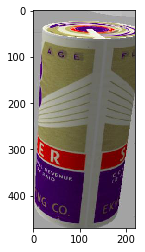

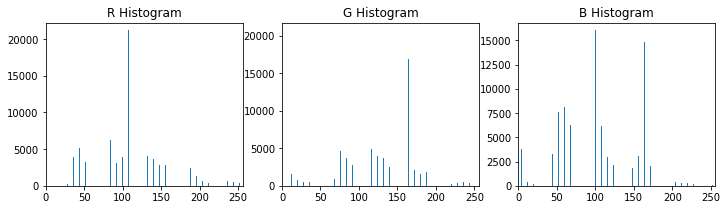

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read in and plot the image
image = mpimg.imread('image.jpeg')
plt.imshow(image)

# Take histograms in R, G, and B
r_hist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
g_hist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
b_hist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

# Generating bin centers
bin_edges = r_hist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

print("Bin Counts \n")
print(r_hist[0])
print("Bin Edges \n")
print(bin_edges)
print("Bin Centers \n")
print(bin_centers)

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, r_hist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, g_hist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, b_hist[0])
plt.xlim(0, 256)
plt.title('B Histogram')
plt.show()

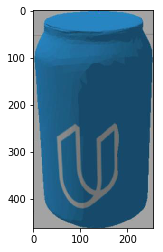

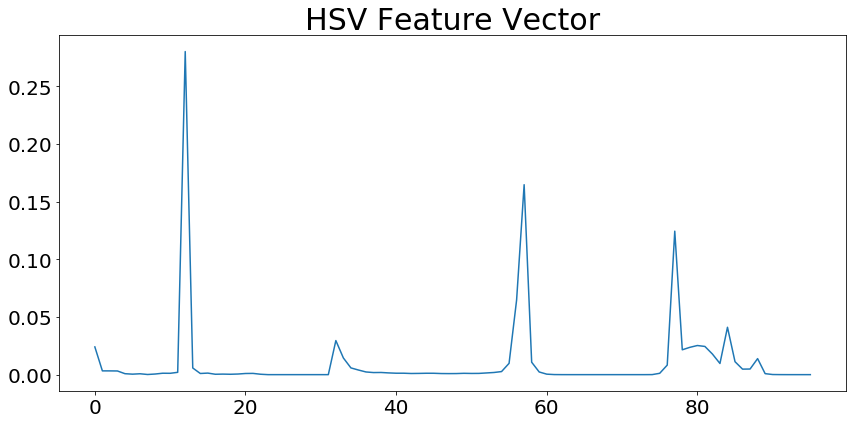

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Read in an image
image = mpimg.imread('Udacican.jpeg')
plt.imshow(image)
# Your other options for input images are:
    # hammer.jpeg
    # beer.jpeg
    # bowl.jpeg
    # create.jpeg
    # disk_part.jpeg
    
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Compute the histogram of the HSV channels separately
    h_hist = np.histogram(hsv_img[:,:,0], bins=nbins, range=bins_range)
    s_hist = np.histogram(hsv_img[:,:,1], bins=nbins, range=bins_range)
    v_hist = np.histogram(hsv_img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((h_hist[0], s_hist[0], v_hist[0])).astype(np.float64)
    # Normalize the result
    norm_features = hist_features / np.sum(hist_features)
    # Return the feature vector
    return norm_features
    
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print('Your function is returning None...')
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))
